<a href="https://colab.research.google.com/github/MphoPetunia/SpecsSurveyData/blob/main/companyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")




In [2]:
data =pd.read_csv("Dots Customer Survey.csv")
data.head()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


Identifying and handling missing values

In [3]:
#Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0
Has Diabetes            

In [4]:
#Handling missing values
data['Annual Family Income ($)'] = data['Annual Family Income ($)'].fillna(data['Annual Family Income ($)'].mean())


In [5]:
#Handling categorical varables
data['Education Status'].fillna(data['Education Status'].mode()[0])

,Education Status
0,Studying
1,Studying
2,Studying
3,Studying
4,Studying
...,...
3215,Dropout
3216,Graduate
3217,Dropout
3218,Dropout


Identifying Outliers

In [6]:
Q1 = data['Annual Family Income ($)'].quantile(0.25)
Q3 = data['Annual Family Income ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtering outliers
outliers = data[(data['Annual Family Income ($)'] < lower_bound) | (data['Annual Family Income ($)'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Unique ID, Country, Age, Annual Family Income ($), Gender, Time spent watching videos/TV, Time spent playing indoor sports, Time spent playing outdoor sports, Total Time spent working in front of screen, Sleeping hours, IQ, Whether parents have specs, English speaker, Migrated within country, Migrated overseas, Maritial Status (0 - Single, 1 - Married, 2 - Divorced), Has Diabetes, Education Status, Has Gym Subscription, Has OTT subscription, Number of friends, Likes spicy food, Likes desserts, Wants to change career, Has debt, Has kids, Drinks alcohol, Smoker, Wear Specs]
Index: []

[0 rows x 29 columns]


Exploring Data characteristics

In [7]:
#Displaying data types and non_null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

In [8]:
#Summarizing statistics of numerical columns
print(data.describe)

<bound method NDFrame.describe of       Unique ID Country  Age  Annual Family Income ($)  Gender  \
0       7319483     CAN   13                     20423    Male   
1       4791965     CAN   13                      5570  Female   
2       2991718     CAN   13                     58706  Female   
3       4220106     CAN   13                     57118    Male   
4       2263008     CAN   14                     59834    Male   
...         ...     ...  ...                       ...     ...   
3215    4936093     KOR   78                     15861  Female   
3216    3458615     KOR   78                     24510    Male   
3217    7651095     KOR   78                      6716    Male   
3218    7490009     KOR   78                     37569    Male   
3219    9367449     KOR   78                     17534    Male   

      Time spent watching videos/TV  Time spent playing indoor sports  \
0                                 3                                 4   
1                          

In [9]:
#Checking unique values for categorial columns
print(data['Gender'].unique())
print(data['Education Status'].unique())

['Male' 'Female']
['Studying' 'Dropout' 'Graduate']


Analyzing Feature Distribution and Relationships with Target variables

<function matplotlib.pyplot.show(close=None, block=None)>

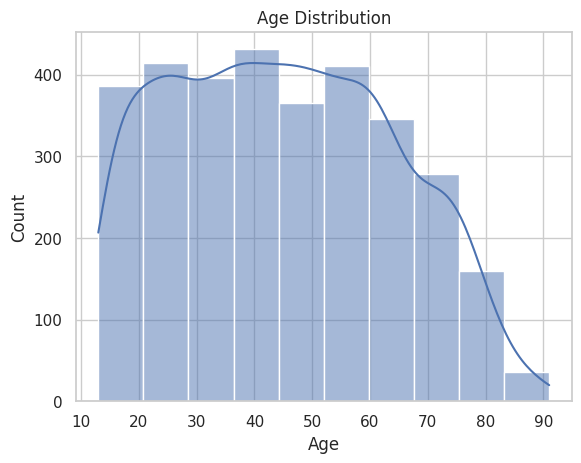

In [10]:
#Distribution of 'Age'
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show

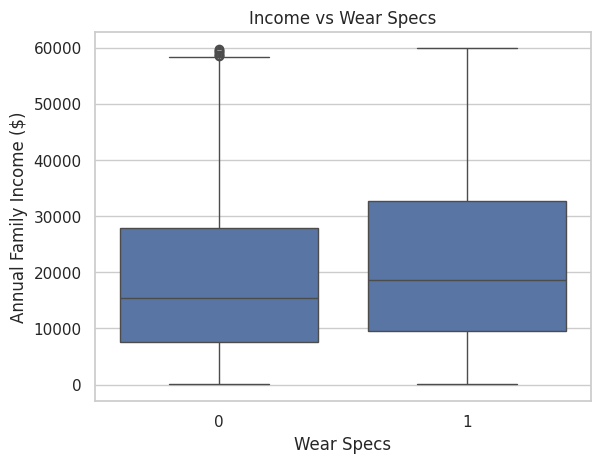

In [11]:
#Relationship between 'Annual Family Income' and 'Wear Specs'
sns.boxplot(x='Wear Specs', y='Annual Family Income ($)', data=data)
plt.title('Income vs Wear Specs')
plt.show()

Based on the analysis and sights from the initial data cleaning and exploration task, the insights provide foundational understanding of the factors influencing eyewear usuage mong young Canadians. Highlighting the importance of demographic variables lifestyle choices aand familial influences in shaping customer behavior regarding eye wear products.

# *Feature Engineering and Visualization*

To perform feature engineering and data visualization on the provided dataset the following steps will be performed;


*   Engineering new features by combining new features to create new ones that may enhance predective power.
*   Visualize feature Distribution using histographs and box plots to understan the distribution features.


*   Explore Realationships by creating scatter plots to visualize relationship between features and target variables(Glass Usage)
*   Perfoem correlation analysis by idenifying highly correlated features using a correlation matrix.





Step 1: Engineering New Features

In [13]:
#Creating new featutes by combining existing ones (For example creating a feature that combines screen with physical activity)
import pandas as pd

data = pd.read_csv("Dots Customer Survey.csv")
#Engineering a new fearture
data['Total Activity level'] = (data['Time spent watching videos/TV'] + data['Time spent playing indoor sports']  + data['Time spent playing outdoor sports'])
print(data[['Total Activity level', 'Wear Specs']].head())



   Total Activity level  Wear Specs
0                    10           1
1                     7           1
2                     5           0
3                    12           0
4                    13           0


Step 2: Visualize Feature Distribution

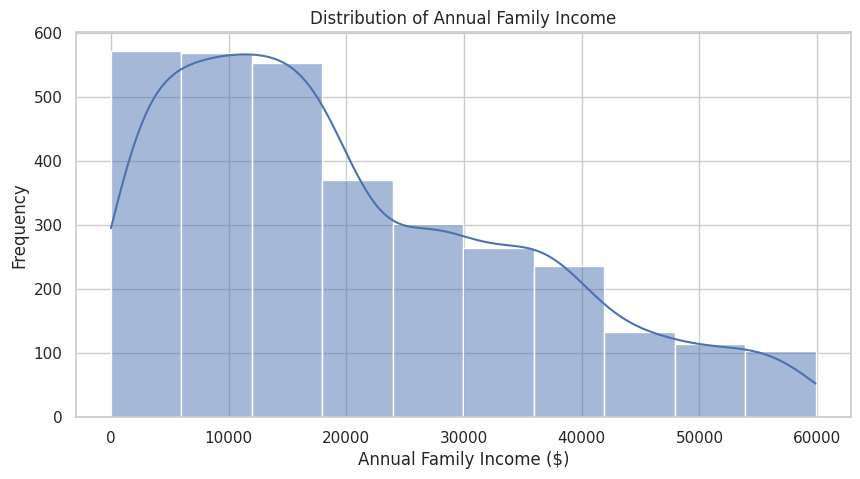

In [26]:
#Using histograms and box plots to Visualize the distribution features such as Annual Family Income($) and Total Activity Level
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#Histogram for Annual Family Income($)
plt.figure(figsize=(10,5))
sns.histplot(data['Annual Family Income ($)'], bins=10, kde=True)
plt.title('Distribution of Annual Family Income')
plt.xlabel('Annual Family Income ($)')
plt.ylabel('Frequency')
plt.show()

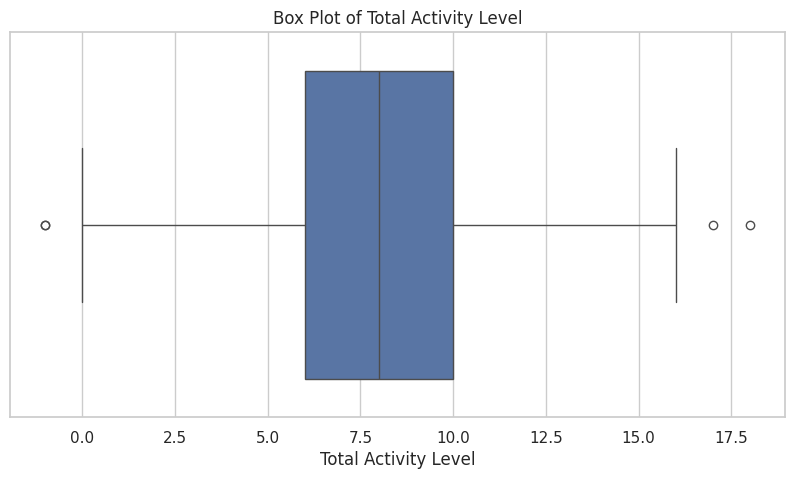

In [27]:
#Box plot for Total Activity Level
plt.figure(figsize=(10,5))
sns.boxplot(x=data['Total Activity level'])
plt.title('Box Plot of Total Activity Level')
plt.xlabel('Total Activity Level')
plt.show()

Step 3: Exploring Relationships with Scatter Plots

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Dots Customer Survey.csv')

In [19]:
# Feature Engineering: Calculating the Total Activity
# Summing up relevant columns to define "Total Activity"
data['Total Activity'] = (
    data['Time spent watching videos/TV'] +
    data['Time spent playing indoor sports'] +
    data['Time spent playing outdoor sports']
)

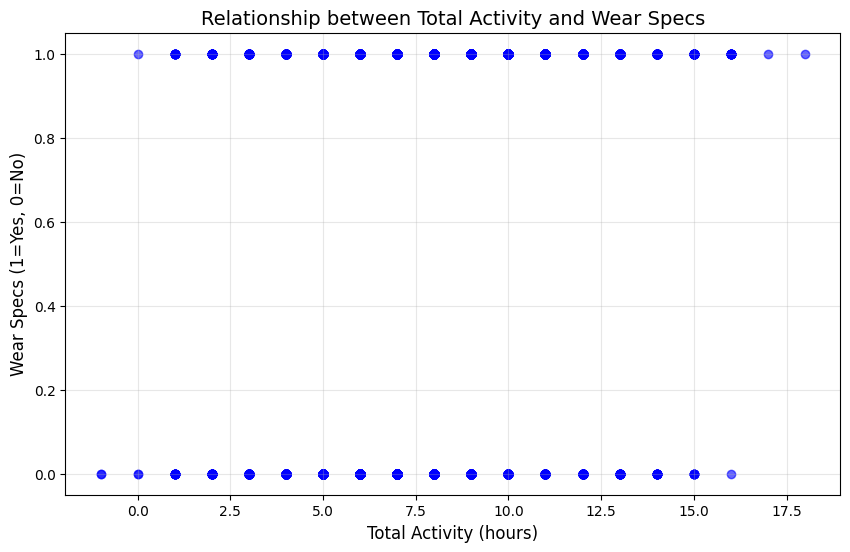

In [20]:
# Scatter Plot: Relationship between Total Activity and Wear Specs
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Activity'], data['Wear Specs'], alpha=0.6, color='blue')
plt.title("Relationship between Total Activity and Wear Specs", fontsize=14)
plt.xlabel("Total Activity (hours)", fontsize=12)
plt.ylabel("Wear Specs (1=Yes, 0=No)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Step 4: Performing Correlation Anaysis
Ina the final step I will copute a correlation matrix to identify correlation features.
In the final step I will compute a correlation matrix to identify correlated features.

Unique ID                                                   int64
Country                                                    object
Age                                                         int64
Annual Family Income ($)                                    int64
Gender                                                     object
Time spent watching videos/TV                               int64
Time spent playing indoor sports                            int64
Time spent playing outdoor sports                           int64
Total Time spent working in front of screen                 int64
Sleeping hours                                              int64
IQ                                                          int64
Whether parents have specs                                  int64
English speaker                                             int64
Migrated within country                                     int64
Migrated overseas                                           int64
Maritial S

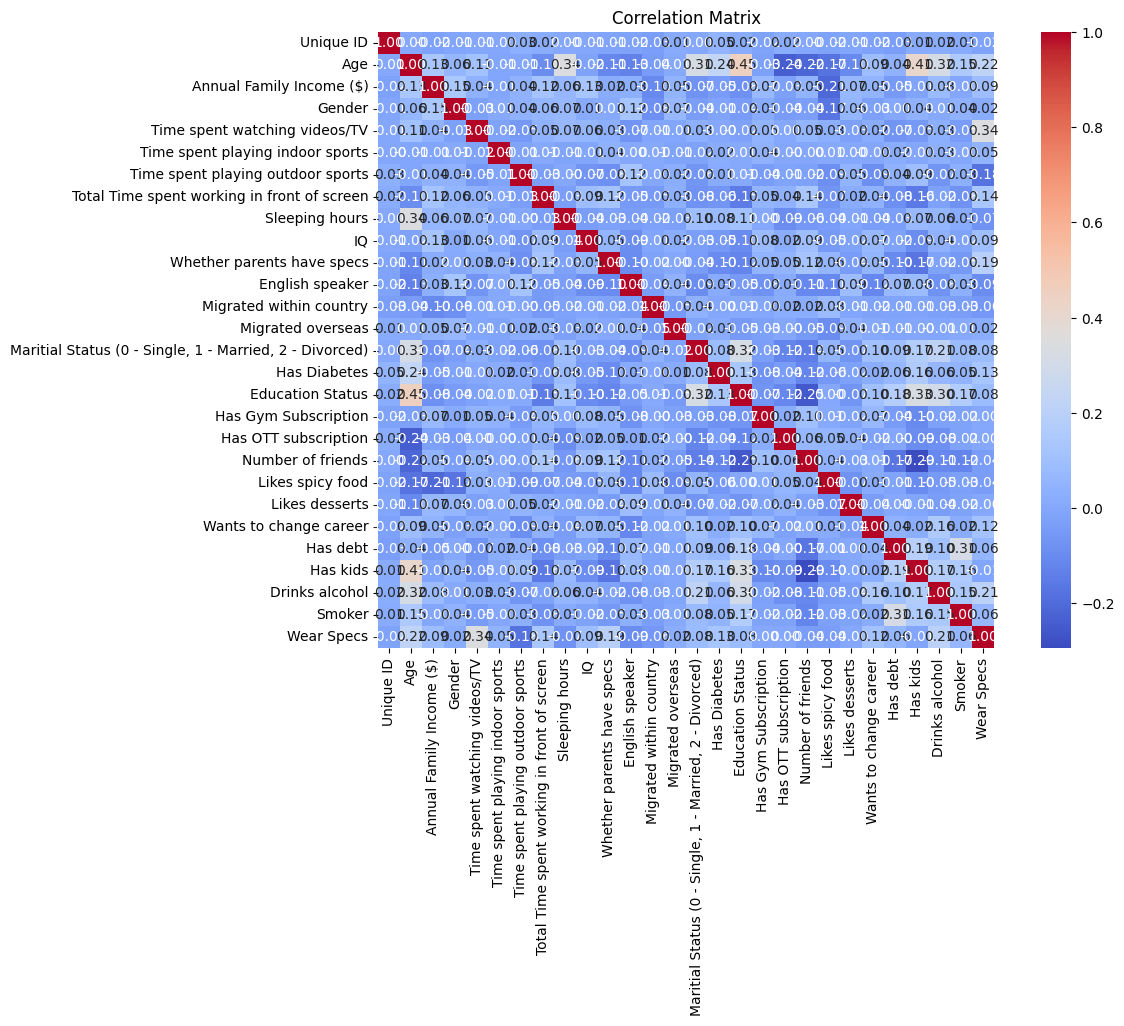

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Dots Customer Survey.csv')

# Checking data types
print(data.dtypes)

# Convert categorical variables to numeric if necessary
# Example: Convert 'Gender' and 'Education Status' to numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Education Status'] = data['Education Status'].map({'Studying': 0, 'Graduate': 1, 'Dropout': 2})

# Dropping non-numeric columns if not needed for correlation
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Handling missing values by dropping rows with NaN values
data_numeric = data_numeric.dropna()

# Computting the correlation matrix
correlation_matrix = data_numeric.corr()

# Displaying the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

***In conclusion***, These insights provide a foundational understanding of the factors influencing eyewear usage among young Canadians. They highlight the importance of demographic variables, lifestyle choices, and familial influences in shaping consumer behavior regarding eye care products. Moving forward, these findings will inform further exploratory analyses and predictive modeling efforts aimed at understanding and addressing the needs of this demographic in the eyewear market.